## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
## Displaying the csv file
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
sns.set_theme(color_codes=True)

## Data Visualization

<AxesSubplot:xlabel='cp', ylabel='count'>

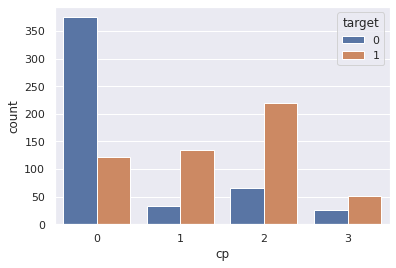

In [6]:
sns.countplot(data=df,x="cp",hue="target")

<AxesSubplot:xlabel='fbs', ylabel='count'>

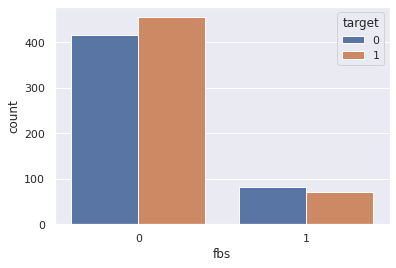

In [9]:
sns.countplot(data=df,x="fbs",hue="target")

<AxesSubplot:xlabel='exang', ylabel='count'>

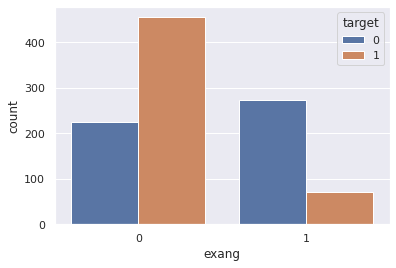

In [10]:
sns.countplot(data=df,x="exang",hue="target")

<AxesSubplot:xlabel='ca', ylabel='count'>

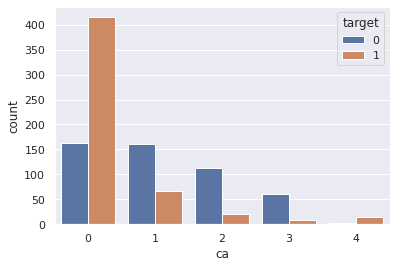

In [11]:
sns.countplot(data=df,x="ca",hue="target")

<AxesSubplot:xlabel='thal', ylabel='count'>

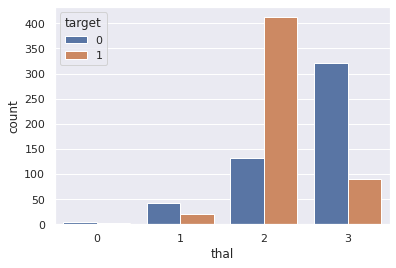

In [12]:
sns.countplot(data=df,x="thal",hue="target")

<AxesSubplot:xlabel='thal', ylabel='Count'>

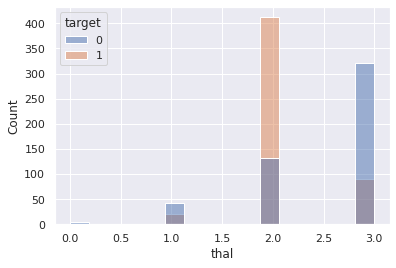

In [13]:
sns.histplot(data=df,x="thal",hue="target")

<AxesSubplot:xlabel='ca', ylabel='Count'>

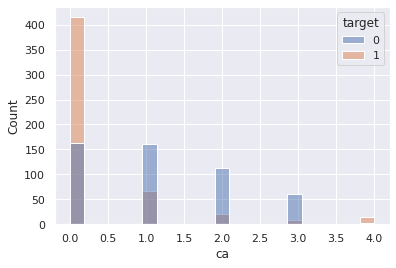

In [14]:
sns.histplot(data=df,x="ca",hue="target")

## Data precprocessing

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- We can infer that the dataset does not contain any NAN Values

## Checking if the class label is balanced or not

1    526
0    499
Name: target, dtype: int64


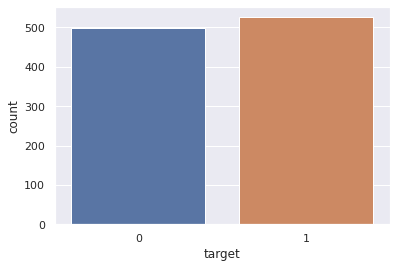

In [18]:
sns.countplot(x=df['target'])
print (df.target.value_counts())

- We can infer that the class label is not balanced

## Balancing the class label

In [24]:
from sklearn.utils import resample
df_majority=df[(df['target']==1)]
df_minority=df[(df['target']==0)]
df_minority_upsampled=resample(df_minority,n_samples=526,random_state=0)
df2=pd.concat([df_majority,df_minority_upsampled])

1    526
0    526
Name: target, dtype: int64


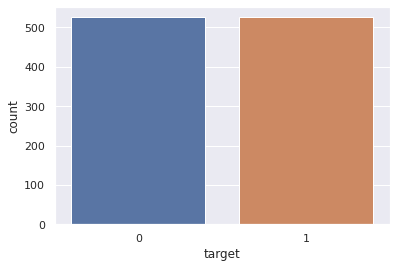

In [26]:
sns.countplot(x=df2['target'])
print (df2.target.value_counts())

## Checking for the impurities

<AxesSubplot:xlabel='age'>

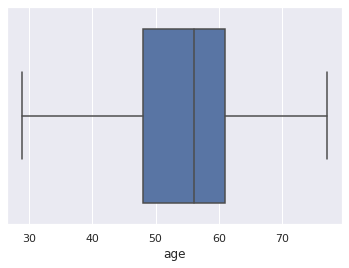

In [27]:
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='cp'>

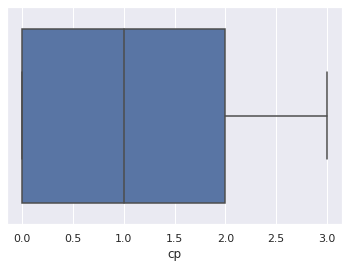

In [28]:
sns.boxplot(x=df["cp"])

<AxesSubplot:xlabel='trestbps'>

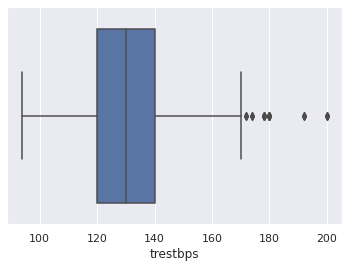

In [29]:
sns.boxplot(x=df["trestbps"])

<AxesSubplot:xlabel='chol'>

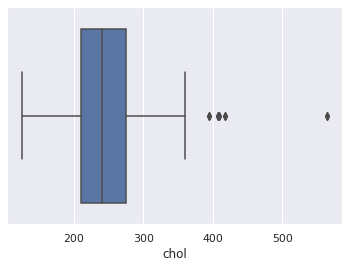

In [30]:
sns.boxplot(x=df["chol"])

<AxesSubplot:xlabel='fbs'>

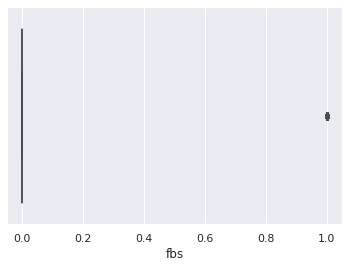

In [31]:
sns.boxplot(x=df["fbs"])

<AxesSubplot:xlabel='exang'>

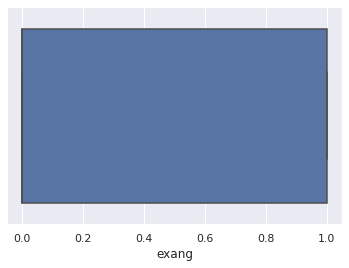

In [32]:
sns.boxplot(x=df["exang"])

<AxesSubplot:xlabel='thalach'>

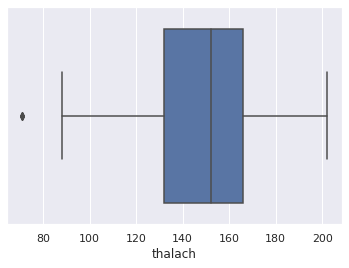

In [33]:
sns.boxplot(x=df["thalach"])

<AxesSubplot:xlabel='restecg'>

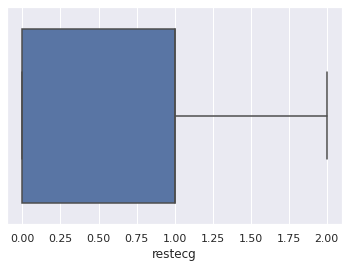

In [34]:
sns.boxplot(x=df["restecg"])

## Removing the outlier using Z-Score moethod

In [35]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis = 1)]
data_clean.shape

(989, 14)

<AxesSubplot:>

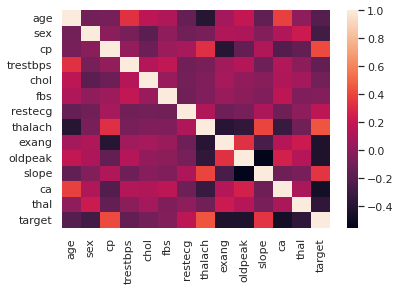

In [36]:
sns.heatmap(data_clean.corr(),fmt='.2g')

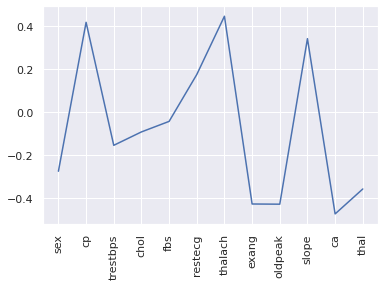

In [37]:
corr = data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

## Separating the target variable

In [38]:
x=data_clean.drop("target",axis=1)
y=data_clean["target"]

## Implementing ML Algorithm

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()

In [45]:
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred_logistic=model.predict(x_test)

In [47]:
y_pred_logistic

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [49]:
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)*100
print(f"The accuracy of logistic regression is: {accuracy_logistic}%")

The accuracy of logistic regression is: 86.86868686868688%


## KNN Algorithm

In [50]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred_knn= classifier.predict(x_test)  
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [51]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print(f"The accuracy of KNN is: {accuracy_knn}%")

The accuracy of KNN is: 79.7979797979798%


## Random Forest Algorithm

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifierrandom=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifierrandom.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [54]:
y_pred_random= classifierrandom.predict(x_test)  
y_pred_random

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [55]:
accuracy_random=accuracy_score(y_test,y_pred_random)*100
print(f"The accuracy of Random forest algorithm is: {accuracy_random}%")

The accuracy of Random forest algorithm is: 98.48484848484848%


## Ada Boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train)

In [58]:
y_pred_abc=model1.predict(x_test)

In [59]:
y_pred_abc

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [60]:
accuracy_abc=accuracy_score(y_test,y_pred_abc)*100
print(f"The accuracy of Ada Boost algorithm is: {accuracy_abc}%")

The accuracy of Ada Boost algorithm is: 89.8989898989899%


## Conclusion

- The accuracy of logistic regression is: 86.86%
- The accuracy of KNN is: 79.79%
- The accuracy of Random forest algorithm is: 98.48%
- The accuracy of Ada Boost algorithm is: 89.89%